## Funda cleaning and feature selection

We want to create a model which predicts house prices. But first we need to do some cleaning and find an independent variable which highly correlates with price

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('funda.csv')
df.head()

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


1. Start with plotting price (dependent variable) versus to other variables. first create a subset of df with only price and the other two variables and next create a <b>pairplot</b>.


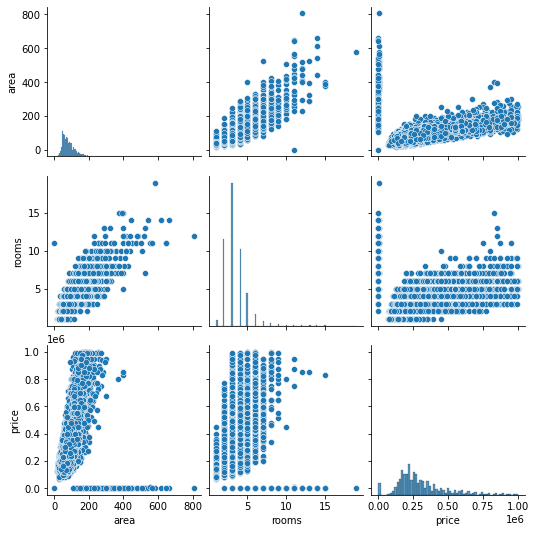

In [12]:
df_sel = df[['area', 'rooms', 'price']]
sns.pairplot(df_sel)
plt.show()

2. It's clear that something is wrong with some of the prices, as they are 0 (or close to 0). Let's plot price in a histogram and boxplot.

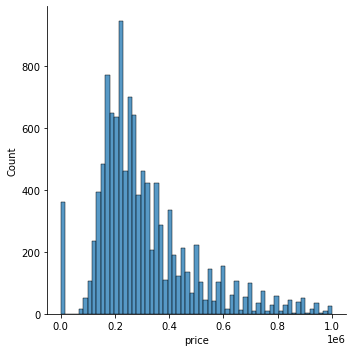

In [15]:
sns.displot(df['price'])
plt.show()

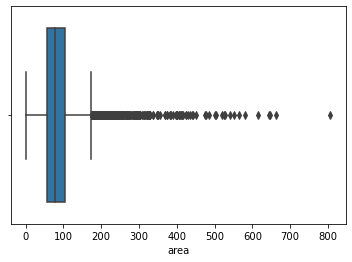

In [16]:
sns.boxplot(x='area', data=df)
plt.show()

3. Also plot the other variables and check for outliers, which you don't want to incorporate in your model.

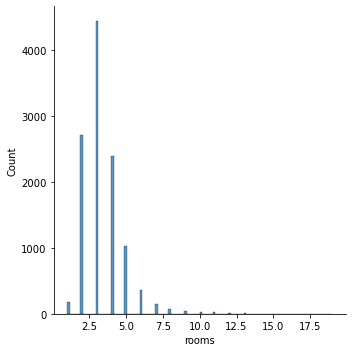

In [17]:
sns.displot(df['rooms'])
plt.show()

4. Check the outliers in your code, by subsetting and analysing the data.

In [18]:
df_outliers = df[(df['area']>500)].sort_values(by='area', ascending=False)
df_outliers.head()

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
5972,5972,Herengracht 203,806,5,1016 BE,25-10-2014,3250,house,12,23-11-2015,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1906
1397,1397,Prinseneiland 93,663,8,1013 LM,25-3-2016,2500,house,14,18-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1882
8278,8278,Prinseneiland 89,646,9,1013 LM,16-9-2015,2550,house,11,1-10-2015,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1892
9499,9499,Sarphatistraat 11,644,4,1017 WS,25-4-2015,2750,house,11,2-9-2015,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1906
462,462,Apollolaan 11,614,6,1077 AA,16-6-2016,4250,house,14,29-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1906


5. Create a subset with the data you want to incorporate in your model. And create another pairplot

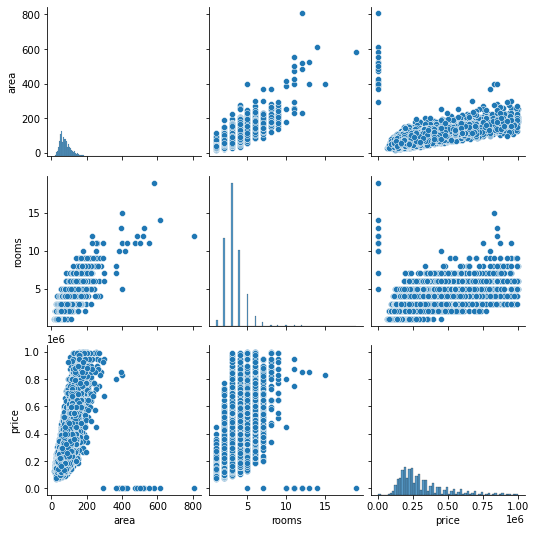

In [22]:
df = df[(df['price']>3000) & (df['area']>10)]
df_sel = df[['area', 'rooms', 'price']]

sns.pairplot(df_sel)
plt.show()

6. Calculate the correlations using:  <i>corr=df[[var1,var2,var3]].corr()</i>

In [20]:
corr = df[['price', 'area', 'rooms']].corr()
corr

,price,area,rooms
price,1.000000,0.633098,0.502478
area,0.633098,1.000000,0.791009
rooms,0.502478,0.791009,1.000000


7. Run the code below for a heatmap

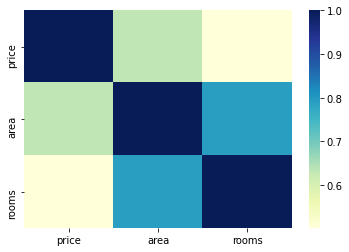

In [21]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

8. Another graph we have not used yet is <b>lmplot</b> (linear model plot), which shows the datapoints and a regression line. Focus on the independent variable <b>area</b> and dependent variable <b>price</b>. Use the attribute <i>scatter_kws={'s':3,'alpha':0.2}</i> to change the style of the data points.

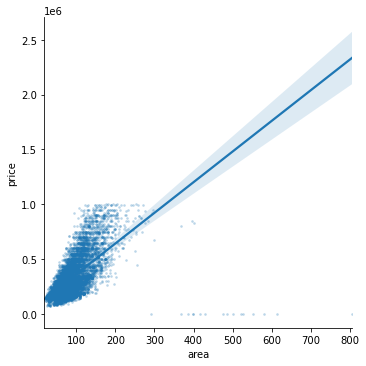

In [25]:
sns.lmplot(x='area', y='price', scatter_kws={'s':3, 'alpha':0.2}, data=df)

9. finally check the significance of the correlation

In [26]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df_sel['area'],df_sel['price']))

(0.633098075961084, 0.0)


This is a strong correlation (0.73) which is highly significant (p < 0.0001)